## NBA Player Salary Capstone

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:
raw = """
1	LeBron James	CLE	$30,963,450	$33,285,709	$35,607,968				Early Bird	$64,249,159
2	Mike Conley	MEM	$26,540,100	$28,530,608	$30,521,115	$32,511,623	$34,504,132		Cap Space	$140,529,829
3	DeMar DeRozan	TOR	$26,540,100	$27,739,975	$27,739,975	$27,739,975	$27,739,975		Cap Space	$109,760,025
4	James Harden	HOU	$26,540,100	$28,299,339	$30,431,854	$32,703,493			Bird Rights	$85,271,293
5	Al Horford	BOS	$26,540,100	$27,734,405	$28,928,710	$30,123,015			Cap Space	$83,203,215
6	Russell Westbrook	OKC	$26,540,100	$28,530,608	$30,670,404				Bird Rights	$55,070,708
7	Kevin Durant	GSW	$26,540,100	$27,734,406					Cap Space	$26,540,100
8	Dirk Nowitzki	DAL	$25,000,000	$25,000,000					Bird Rights	$25,000,000
9	Carmelo Anthony	NYK	$24,559,380	$26,243,760	$27,928,140				Bird Rights	$50,803,140
10	Damian Lillard	POR	$24,328,425	$26,153,057	$27,977,689	$29,802,321	$31,626,953		1st Round Pick	$139,888,445
11	Chris Bosh	MIA	$23,741,060	$25,289,390	$26,837,720				Bird Rights	$75,868,170
12	Dwyane Wade	CHI	$23,200,000	$23,800,000					Cap Space	$23,200,000
13	Dwight Howard	ATL	$23,180,275	$23,500,000	$23,819,725				Cap Space	$70,500,000
14	Chris Paul	LAC	$22,868,828	$24,268,960					Bird Rights	$22,868,828
15	Bradley Beal	WAS	$22,116,750	$23,775,506	$25,434,263	$27,093,019	$28,751,775		Cap Space	$127,171,313
16	Anthony Davis	NOP	$22,116,750	$23,775,506	$25,434,263	$27,093,019	$28,751,775		1st Round Pick	$127,171,313
17	Andre Drummond	DET	$22,116,750	$23,775,506	$25,434,263	$27,093,019	$28,751,775		Cap Space	$98,419,538
18	Chandler Parsons	MEM	$22,116,750	$23,112,004	$24,107,258	$25,102,511			Cap Space	$94,438,523
19	Hassan Whiteside	MIA	$22,116,750	$23,775,506	$25,434,263	$27,093,018			Cap Space	$71,326,519
20	Harrison Barnes	DAL	$22,116,750	$23,112,004	$24,107,258	$25,102,512			Cap Space	$69,336,01221
21	Derrick Rose	NYK	$21,323,250						Bird Rights	$21,323,250
22	Marc Gasol	MEM	$21,165,675	$22,642,350	$24,119,025	$25,595,700			Bird Rights	$67,927,050
23	Kevin Love	CLE	$21,165,675	$22,642,350	$24,119,025	$25,595,700			Bird Rights	$67,927,050
24	DeAndre Jordan	LAC	$21,165,675	$22,642,350	$24,119,025				Bird Rights	$43,808,025
25	Brook Lopez	BRK	$21,165,675	$22,642,350					Bird Rights	$43,808,025
26	Nicolas Batum	CHO	$20,869,566	$22,434,783	$24,000,000	$25,565,217	$27,130,434		Cap Space	$92,869,566
27	LaMarcus Aldridge	SAS	$20,575,005	$21,461,010	$22,347,015				Cap Space	$42,036,015
28	Blake Griffin	LAC	$20,140,838	$21,373,950					Bird Rights	$41,514,788
29	Paul Millsap	ATL	$20,072,033	$21,472,407					Bird Rights	$20,072,033
30	Ryan Anderson	HOU	$18,735,364	$19,578,455	$20,421,546	$21,264,635			Cap Space	$80,000,000
31	Allen Crabbe	POR	$18,500,000	$18,500,000	$19,332,500	$18,500,000			Cap Space	$56,332,500
32	Paul George	IND	$18,314,532	$19,508,958	$20,703,384				1st Round Pick	$37,823,490
33	Luol Deng	LAL	$18,000,000	$17,190,000	$18,000,000	$18,810,000			Cap Space	$72,000,000
34	Kawhi Leonard	SAS	$17,638,063	$18,868,625	$20,099,189	$21,329,752			Bird Rights	$56,605,877
35	Kyrie Irving	CLE	$17,638,063	$18,868,625	$20,099,188	$21,329,750			Bird Rights	$56,605,876
36	Jimmy Butler	CHI	$17,552,209	$18,696,918	$19,841,624	$19,841,624			Bird Rights	$56,090,751
37	Tobias Harris	DET	$17,200,000	$16,000,000	$14,800,000				Bird Rights	$48,000,000
38	Enes Kanter	OKC	$17,145,838	$17,884,176	$18,622,514				Bird Rights	$35,030,014
39	Wesley Matthews	DAL	$17,100,000	$17,900,000	$18,600,000				Cap Space	$53,600,000
40	Greg Monroe	MIL	$17,100,000	$17,900,000					Cap Space	$17,100,000
41	Evan Fournier	ORL	$17,000,000	$17,000,000	$17,000,000	$17,000,000	$17,000,000		Cap Space	$85,000,000
42	Joakim Noah	NYK	$17,000,000	$17,765,000	$18,530,000	$19,295,000			Cap Space	$72,590,000
43	Bismack Biyombo	ORL	$17,000,000	$17,000,000	$17,000,000	$18,872,365			Cap Space	$51,000,000
44	John Wall	WAS	$16,957,900	$18,063,850	$19,169,800				1st Round Pick	$54,191,550
45	DeMarcus Cousins	SAC	$16,957,900	$18,063,850					1st Round Pick	$35,021,750
46	Klay Thompson	GSW	$16,663,575	$17,826,150	$18,988,725				1st Round Pick	$53,478,450
47	Evan Turner	POR	$16,393,443	$17,131,148	$17,868,852	$18,606,557			Cap Space	$70,000,000
48	Gordon Hayward	UTA	$16,073,140	$16,736,710					Bird Rights	$16,073,140
49	Timofey Mozgov	LAL	$16,000,000	$15,280,000	$16,000,000	$16,720,000			Cap Space	$64,000,000
50	Ian Mahinmi	WAS	$15,944,154	$16,661,641	$15,944,154	$15,450,051			Cap Space	$64,000,000
51	Goran Dragic	MIA	$15,890,000	$17,000,000	$18,110,000	$19,220,000			Bird Rights	$51,000,000
52	Kent Bazemore	ATL	$15,730,338	$16,910,113	$18,089,887	$19,269,662			Cap Space	$50,730,338
53	Pau Gasol	SAS	$15,500,000	$16,197,500					Cap Space	$15,500,000
54	Draymond Green	GSW	$15,330,435	$16,400,000	$17,469,565	$18,539,130			Bird Rights	$67,739,130
55	Tristan Thompson	CLE	$15,330,435	$16,400,000	$17,469,565	$18,539,130			Bird Rights	$67,739,130
56	Khris Middleton	MIL	$15,200,000	$14,100,000	$13,000,000	$13,000,000			Bird Rights	$42,300,000
57	Danilo Gallinari	DEN	$15,050,000	$16,100,000						$15,050,000
58	Jeff Green	ORL	$15,000,000						Cap Space	$15,000,000
59	Reggie Jackson	DET	$14,956,522	$16,000,000	$17,043,478	$18,086,956			Bird Rights	$66,086,956
60	Tony Parker	SAS	$14,445,313	$15,453,126					Bird Rights	$29,898,439
61	Jonas Valanciunas	TOR	$14,382,022	$15,460,675	$16,539,326	$17,617,977			1st Round Pick	$46,382,023
62	DeMarre Carroll	TOR	$14,200,000	$14,800,000	$15,400,000				Cap Space	$44,400,000
63	Thaddeus Young	IND	$14,153,652	$14,796,348	$13,764,045				Bird Rights	$28,950,000
64	Eric Bledsoe	PHO	$14,000,000	$14,500,000	$15,000,000				Bird Rights	$43,500,000
65	Rajon Rondo	CHI	$14,000,000	$13,397,000					Cap Space	$17,000,000
66	Manu Ginobili	SAS	$14,000,000						Cap Space	$14,000,000
67	Ricky Rubio	MIN	$13,550,000	$14,250,000	$14,800,000				1st Round Pick	$42,600,000
68	Rudy Gay	SAC	$13,333,333	$14,263,566					Bird Rights	$13,333,333
69	Jamal Crawford	LAC	$13,253,012	$14,264,988	$14,500,000				Cap Space	$30,518,000
70	Robin Lopez	CHI	$13,219,250	$13,788,500	$14,357,750				Cap Space	$41,365,500
71	Michael Kidd-Gilchrist	CHO	$13,000,000	$13,000,000	$13,000,000	$13,000,000			1st Round Pick	$39,000,000
72	J.R. Smith	CLE	$12,800,000	$13,760,000	$14,720,000	$15,680,000			Bird Rights	$45,150,000
73	Brandon Knight	PHO	$12,606,250	$13,618,750	$14,631,250	$15,643,750				$56,500,000
74	John Henson	MIL	$12,517,606	$11,672,536	$10,827,466	$9,982,396			1st Round Pick	$45,000,004
75	Miles Plumlee	MIL	$12,500,000	$12,500,000	$12,500,000	$12,500,000			Bird Rights	$50,000,000
76	Jordan Clarkson	LAL	$12,500,000	$11,562,500	$12,500,000	$13,437,500			Cap Space	$50,000,000
77	Arron Afflalo	SAC	$12,500,000	$12,500,000					Cap Space	$14,000,000
78	Tyson Chandler	PHO	$12,415,000	$13,000,000	$13,585,000				Cap Space	$39,000,000
79	Eric Gordon	HOU	$12,385,364	$12,943,020	$13,500,375	$14,057,730			Cap Space	$52,886,489
80	Marvin Williams	CHO	$12,250,000	$13,168,750	$14,087,500	$15,006,250			Cap Space	$39,506,250
81	Serge Ibaka	ORL	$12,250,000						Bird Rights	$12,250,000
82	Stephen Curry	GSW	$12,112,359						Bird Rights	$12,112,359
83	Nikola Pekovic	MIN	$12,100,000	$11,600,000					Bird Rights	$23,700,000
84	Kenneth Faried	DEN	$12,078,652	$12,921,348	$13,764,045				1st Round Pick	$38,764,045
85	Marcin Gortat	WAS	$12,000,000	$12,782,609	$13,565,218				Bird Rights	$38,347,827
86	Kemba Walker	CHO	$12,000,000	$12,000,000	$12,000,000				1st Round Pick	$36,000,000
87	Kyle Lowry	TOR	$12,000,000	$12,000,000					Bird Rights	$12,000,000
88	Amir Johnson	BOS	$12,000,000						Cap Space	$12,000,000
89	Nikola Vucevic	ORL	$11,750,000	$12,250,000	$12,750,000				Bird Rights	$36,750,000
90	Jeremy Lin	BRK	$11,483,254	$12,000,000	$12,516,746				Cap Space	$23,483,254
91	Jrue Holiday	NOP	$11,286,518						Bird Rights	$11,286,518
92	Courtney Lee	NYK	$11,242,000	$11,747,890	$12,253,780	$12,759,670			Cap Space	$48,003,340
93	Solomon Hill	NOP	$11,241,218	$11,747,073	$12,252,928	$12,758,781			Cap Space	$48,000,000
94	Wilson Chandler	DEN	$11,200,000	$12,000,000	$12,800,000					$36,000,000
95	Andre Iguodala	GSW	$11,131,368						Bird Rights	$11,131,368
96	Derrick Favors	UTA	$11,050,000	$12,000,000					1st Round Pick	$23,050,000
97	Andrew Bogut	DAL	$11,027,027						Bird Rights	$11,027,027
98	Austin Rivers	LAC	$11,000,000	$11,825,000	$12,650,000				Cap Space	$22,825,000
99	Joe Johnson	UTA	$11,000,000	$10,505,000					Cap Space	$21,505,000
100	Jon Leuer	DET	$10,991,957	$10,497,319	$10,002,681	$9,508,043			Cap Space	$41,000,000
101	Monta Ellis	IND	$10,770,000	$11,230,000	$11,700,000				Cap Space	$22,000,000
102	Mirza Teletovic	MIL	$10,500,000	$10,500,000	$10,500,000				Cap Space	$31,500,000
103	Jared Dudley	PHO	$10,470,000	$10,000,000	$9,530,000				Cap Space	$30,000,000
104	Zach Randolph	MEM	$10,361,445						Bird Rights	$10,361,445
105	Al Jefferson	IND	$10,230,179	$9,769,821	$10,000,000				Cap Space	$24,000,000
106	Tyreke Evans	NOP	$10,203,755						Bird Rights	$10,203,755
107	Alec Burks	UTA	$10,154,495	$10,845,506	$11,536,515				1st Round Pick	$32,536,516
108	Terrence Ross	TOR	$10,000,000	$10,500,000	$10,500,000				Rookie scale extension	$31,000,000
109	Danny Green	SAS	$10,000,000	$10,000,000	$10,000,000				Bird Rights	$20,000,000
110	Omer Asik	NOP	$9,904,494	$10,595,505	$11,286,516	$11,977,527			Bird Rights	$34,786,515
111	Iman Shumpert	CLE	$9,700,000	$10,300,000	$11,000,000				Bird Rights	$31,000,000
112	Matthew Dellavedova	MIL	$9,607,500	$9,607,500	$9,607,500	$9,607,500			Cap Space	$38,430,000
113	Jerryd Bayless	PHI	$9,424,084	$9,000,000	$8,575,916				Cap Space	$27,000,000
114	Trevor Booker	BRK	$9,250,000	$9,125,000					Cap Space	$18,375,000
115	Meyers Leonard	POR	$9,213,484	$9,904,495	$10,595,506	$11,286,515			Cap Space	$41,000,000
116	Gerald Henderson	PHI	$9,000,000	$9,000,000					Cap Space	$10,000,000
117	Deron Williams	DAL	$9,000,000						Cap Space	$9,000,000
118	Maurice Harkless	POR	$8,988,764	$9,662,921	$10,337,079	$11,011,236			Cap Space	$40,000,000
119	Taj Gibson	CHI	$8,950,000						Bird Rights	$8,950,000
120	Jeff Teague	IND	$8,800,000						Bird Rights	$8,800,000
121	Tiago Splitter	ATL	$8,550,000						Bird Rights	$8,550,000
122	Ersan Ilyasova	PHI	$8,400,000						Bird Rights	$8,400,000
123	Dwight Powell	DAL	$8,375,000	$9,003,125	$9,631,250	$10,259,375			Cap Space	$27,009,375
124	Avery Bradley	BOS	$8,269,663	$8,808,989					Bird Rights	$17,078,652
125	E'Twaun Moore	NOP	$8,081,363	$8,445,024	$8,808,685	$8,664,928			Cap Space	$34,000,000
126	Darrell Arthur	DEN	$8,070,175	$7,464,912	$7,464,912				Cap Space	$15,535,087
127	Kosta Koufos	SAC	$8,046,500	$8,393,000	$8,739,500				Cap Space	$16,439,500
128	Garrett Temple	SAC	$8,000,000	$8,000,000	$8,000,000				Cap Space	$24,000,000
129	Anthony Tolliver	SAC	$8,000,000	$8,000,000					Cap Space	$10,000,000
130	George Hill	UTA	$8,000,000						Bird Rights	$8,000,000
131	Sergio Rodriguez	PHI	$8,000,000						Cap Space	$8,000,000
132	Kevin Garnett	MIN	$8,000,000							$8,000,000
133	Tyler Zeller	BOS	$8,000,000	$8,000,000					Cap Space	$8,000,000
134	Trevor Ariza	HOU	$7,806,971	$7,420,912					Bird Rights	$15,227,883
135	Channing Frye	CLE	$7,806,971	$7,420,912					Cap Space	$15,227,883
136	Jose Calderon	LAL	$7,708,427						Cap Space	$7,708,427
137	Al-Farouq Aminu	POR	$7,680,965	$7,319,035	$6,957,105				Cap Space	$21,957,105
138	Cole Aldrich	MIN	$7,643,979	$7,300,000	$6,956,021				Cap Space	$17,000,000
139	Corey Brewer	HOU	$7,600,000	$7,600,000					Cap Space	$15,200,000
140	Markieff Morris	WAS	$7,400,000	$8,000,000	$8,600,000				Bird Rights	$24,000,000
141	Festus Ezeli	POR	$7,400,000	$7,733,000					Cap Space	$8,400,000
142	J.J. Redick	LAC	$7,377,500						Bird Rights	$7,377,500
143	Cory Joseph	TOR	$7,330,000	$7,660,000	$8,000,000				Cap Space	$14,990,000
144	D.J. Augustin	ORL	$7,250,000	$7,250,000	$7,250,000	$7,250,000			Cap Space	$29,000,000
145	Boban Marjanovic	DET	$7,000,000	$7,000,000	$7,000,000				Cap Space	$21,000,000
146	Lou Williams	LAL	$7,000,000	$7,000,000					Cap Space	$14,000,000
147	Boris Diaw	UTA	$7,000,000	$7,500,000					Bird Rights	$7,000,000
148	Rodney Stuckey	IND	$7,000,000	$7,500,000					Cap Space	$7,000,000
149	Ed Davis	POR	$6,666,667	$6,352,531					Cap Space	$13,019,198
150	Isaiah Thomas	BOS	$6,587,132	$6,261,395						$12,848,527
151	Victor Oladipo	OKC	$6,552,960	$21,000,000	$21,000,000	$21,000,000	$21,000,000		1st Round Pick	$90,552,960
152	Jodie Meeks	ORL	$6,540,000						Cap Space	$6,540,000
153	Jeremy Lamb	CHO	$6,511,628	$7,000,000	$7,488,372				Rookie scale extension	$21,000,000
154	Carl Landry	PHI	$6,500,000							$6,500,000
155	Aron Baynes	DET	$6,500,000	$6,500,000					Cap Space	$6,500,000
156	Spencer Hawes	CHO	$6,348,759	$6,021,175					MLE	$6,348,759
157	Marco Belinelli	CHO	$6,333,333	$6,333,333					Cap Space	$12,666,666
158	Jae Crowder	BOS	$6,286,408	$6,796,117	$7,305,825	$7,815,533			Bird Rights	$28,203,883
159	Lance Thomas	NYK	$6,191,000	$6,655,325	$7,119,650	$7,583,975			Cap Space	$19,965,975
160	Tarik Black	LAL	$6,191,000	$6,655,325					Cap Space	$6,191,000
161	Matt Barnes	SAC	$6,125,000	$6,400,625					Cap Space	$6,125,000
162	Andrew Nicholson	WAS	$6,088,993	$6,362,998	$6,637,002	$6,911,007			Cap Space	$19,088,993
163	Patrick Patterson	TOR	$6,050,000						Bird Rights	$6,050,000
164	Andrew Wiggins	MIN	$6,006,600	$7,574,322					1st Round Pick	$13,580,922
165	Ish Smith	DET	$6,000,000	$6,000,000	$6,000,000				Cap Space	$18,000,000
166	Patrick Beverley	HOU	$6,000,000	$5,500,000	$5,000,000				Bird Rights	$11,500,000
167	Wayne Ellington	MIA	$6,000,000	$6,270,000					Cap Space	$6,000,000
168	Ramon Sessions	CHO	$6,000,000	$6,270,000					Cap Space	$6,000,000
169	Alex Abrines	OKC	$5,994,764	$5,725,000	$5,455,236				Cap Space	$17,175,000
170	Karl-Anthony Towns	MIN	$5,960,160	$6,216,840	$7,839,435				1st round pick	$12,177,000
171	Ben Simmons	PHI	$5,903,160	$6,168,840	$6,434,520	$8,113,930			1st Round pick	$12,072,000
172	Otto Porter	WAS	$5,893,981						1st Round Pick	$5,893,981
173	Josh McRoberts	MIA	$5,782,450	$6,021,175					MLE	$5,782,450
174	Shaun Livingston	GSW	$5,782,450						MLE	$5,782,450
175	Nikola Mirotic	CHI	$5,782,450						Cap Space	$5,782,450
176	Brandan Wright	MEM	$5,700,000	$6,000,000					MLE	$11,700,000
177	Tyler Johnson	MIA	$5,628,000	$5,881,260	$19,245,370	$19,245,370			Cap Space	$30,754,630
178	Wesley Johnson	LAC	$5,628,000	$5,881,260	$6,134,000				Cap Space	$11,509,260
179	Jared Sullinger	TOR	$5,628,000						Cap Space	$5,628,000
180	Tony Allen	MEM	$5,505,618						Bird Rights	$5,505,618
181	Deron Williams	BRK	$5,500,000	$5,500,000	$5,500,000	$5,500,000				$22,000,000
182	Nick Young	LAL	$5,443,918	$5,668,667					Cap Space	$11,112,585
183	Josh Smith	DET	$5,400,000	$5,400,000	$5,400,000	$5,400,000				$27,000,000
184	Jabari Parker	MIL	$5,374,320	$6,782,392					1st Round Pick	$12,156,712
185	D'Angelo Russell	LAL	$5,332,800	$5,562,360	$7,019,698				1st round pick	$10,895,160
186	Cody Zeller	CHO	$5,318,313	$12,584,270	$13,528,090	$14,471,910	$15,415,730		1st Round Pick	$61,318,313
187	P.J. Tucker	PHO	$5,300,000						Cap Space	$1,500,000
188	Brandon Ingram	LAL	$5,281,680	$5,519,400	$5,757,120	$7,265,485			1st Round pick	$10,801,080
189	Kyle Korver	ATL	$5,239,437						Bird Rights	$5,239,437
190	Darren Collison	SAC	$5,229,454						MLE	$5,229,454
191	Langston Galloway	NOP	$5,200,000	$5,430,000					Cap Space	$5,200,000
192	Jason Smith	WAS	$5,000,000	$5,225,000	$5,450,000				Cap Space	$10,225,000
193	C.J. Watson	ORL	$5,000,000	$5,000,000					Cap Space	$6,000,000
194	Brandon Jennings	NYK	$5,000,000						Cap Space	$5,000,000
195	Roy Hibbert	CHO	$5,000,000						Cap Space	$5,000,000
196	Luis Scola	BRK	$5,000,000						Cap Space	$5,000,000
197	Jonas Jerebko	BOS	$5,000,000						Bird Rights	$5,000,000
198	Kyle Singler	OKC	$4,837,500	$4,666,500	$4,996,000	$5,333,500			Bird Rights	$14,500,000
199	Mike Dunleavy	CLE	$4,837,500	$5,175,000					Early Bird Rights	$6,500,000
200	Joel Embiid	PHI	$4,826,160	$6,100,266					1st Round Pick	$10,926,426
201	Alex Len	PHO	$4,823,621						1st Round Pick	$4,823,621
202	Jahlil Okafor	PHI	$4,788,840	$4,995,120	$6,313,832				1st round pick	$9,783,960
203	Jaylen Brown	BOS	$4,743,000	$4,956,480	$5,169,960	$6,534,829			1st Rd pick	$9,699,480
204	Marcus Morris	DET	$4,625,000	$5,000,000	$5,375,000				Bird Rights	$15,000,000
205	Alexis Ajinca	NOP	$4,600,000	$4,900,000	$5,300,000				Early Bird Rights	$14,800,000
206	Derrick Williams	MIA	$4,598,000						Cap Space	$4,598,000
207	C.J. Miles	IND	$4,583,450	$4,772,675					MLE	$4,583,450
208	Jameer Nelson	DEN	$4,540,525	$4,736,050					Cap Space	$9,276,575
209	Nerlens Noel	PHI	$4,384,490						1st Round Pick	$4,384,490
210	Aaron Gordon	ORL	$4,351,320	$5,504,420					1st Round Pick	$9,855,740
211	Greivis Vasquez	BRK	$4,347,826							$4,347,826
212	Kristaps Porzingis	NYK	$4,317,720	$4,503,600	$5,697,054				1st round pick	$8,821,320
213	Dragan Bender	PHO	$4,276,320	$4,468,800	$4,661,280	$5,896,519			1st Round pick	$8,745,120
214	Vince Carter	MEM	$4,264,057							$2,000,000
215	Devin Harris	DAL	$4,228,000	$4,403,000					Cap Space	$8,631,000
216	J.J. Barea	DAL	$4,096,950	$3,903,900	$3,710,850				Cap Space	$11,711,700
217	Ben McLemore	SAC	$4,008,882						1st Round Pick	$4,008,882
218	Leandro Barbosa	PHO	$4,000,000	$4,000,000					Cap Space	$4,500,000
219	Udonis Haslem	MIA	$4,000,000						Cap Space	$4,000,000
220	James Johnson	MIA	$4,000,000						Cap Space	$4,000,000
221	Lavoy Allen	IND	$4,000,000	$4,300,000						$4,000,000
222	Kris Humphries	ATL	$4,000,000						Cap Space	$4,000,000
223	Dante Exum	UTA	$3,940,320	$4,992,385					1st Round Pick	$8,932,705
224	Jordan Hill	MIN	$3,911,380	$4,088,020					Cap Space	$3,911,380
225	Mario Hezonja	ORL	$3,909,840	$4,078,320	$5,167,231				1st round pick	$7,988,160
226	Kyle O'Quinn	NYK	$3,900,000	$4,100,000	$4,250,000				Bird Rights	$8,000,000
227	Kris Dunn	MIN	$3,872,520	$4,046,760	$4,221,000	$5,348,007			1st Round pick	$7,919,280
228	Thabo Sefolosha	ATL	$3,850,000							$3,850,000
229	Nemanja Bjelica	MIN	$3,800,000	$3,949,999					MLE	$7,749,999
230	Nick Collison	OKC	$3,750,000						Bird Rights	$3,750,000
231	Kentavious Caldwell-Pope	DET	$3,678,319						1st Round Pick	$3,678,319
232	Quincy Pondexter	NOP	$3,617,978	$3,853,931					1st Round Pick	$7,471,909
233	Patrick Mills	SAS	$3,578,948						Bird Rights	$3,578,948
234	Marcus Smart	BOS	$3,578,880	$4,538,020					1st Round Pick	$8,116,900
235	Bojan Bogdanovic	BRK	$3,573,020						MLE	$3,573,020
236	Willie Cauley-Stein	SAC	$3,551,160	$3,704,160	$4,696,875				1st round pick	$7,255,320
237	Will Barton	DEN	$3,533,333	$3,533,333					Bird Rights	$7,066,666
238	Buddy Hield	NOP	$3,517,200	$3,675,480	$3,833,760	$4,861,208			1st Round pick	$7,192,680
239	Paul Pierce	LAC	$3,500,000	$3,700,000					Mini MLE	$7,200,000
240	Brandon Rush	MIN	$3,500,000						Cap Space	$3,500,000
241	Mike Miller	DEN	$3,500,000	$3,500,000					Cap Space	$3,500,000
242	Anthony Morrow	OKC	$3,488,000						Cap Space	$3,488,000
243	Trey Burke	WAS	$3,386,598						1st Round Pick	$3,386,598
244	Mike Scott	ATL	$3,333,334							
245	K.J. McDaniels	HOU	$3,333,333	$3,333,334					Mid-level exception	$6,666,667
246	Troy Daniels	MEM	$3,332,940	$3,408,520	$3,258,540				Cap Space	$10,000,000
247	Julius Randle	LAL	$3,267,120	$4,149,242					1st Round Pick	$7,416,362
248	Emmanuel Mudiay	DEN	$3,241,800	$3,381,480	$4,294,480				1st round pick	$6,623,280
249	C.J. McCollum	POR	$3,219,579	$23,962,573	$25,759,766	$27,556,959	$29,354,152		1st Round Pick	$109,853,029
250	Jamal Murray	DEN	$3,210,840	$3,355,320	$3,499,800	$4,444,746			1st Round pick	$6,566,160
251	Michael Carter-Williams	CHI	$3,183,526						1st Round Pick	$3,183,526
252	Steven Adams	OKC	$3,140,517	$22,471,910	$24,157,303	$25,842,697	$27,528,090		1st Round Pick	$103,140,517
253	Kelly Olynyk	BOS	$3,094,014						1st Round Pick	$3,094,014
254	Shabazz Muhammad	MIN	$3,046,299						1st Round Pick	$3,046,299
255	Justin Hamilton	BRK	$3,000,000	$3,000,000					Cap Space	$6,000,000
256	Tibor Pleiss	PHI	$3,000,000	$500,000						$3,500,000
257	Omri Casspi	SAC	$3,000,000						Room Exception	$3,000,000
258	Giannis Antetokounmpo	MIL	$2,995,421	$22,471,910	$24,157,303	$25,842,697	$27,528,090		1st Round Pick	$102,995,421
259	Nik Stauskas	PHI	$2,993,040	$3,807,146					1st Round Pick	$6,800,186
260	Dante Cunningham	NOP	$2,978,250	$3,106,500					MLE	$2,978,250
261	Stanley Johnson	DET	$2,969,880	$3,097,800	$3,940,402				1st round pick	$6,067,680
262	Marquese Chriss	PHO	$2,941,440	$3,073,800	$3,206,160	$4,078,236			1st Rd pick	$6,015,240
263	Mindaugas Kuzminskas	NYK	$2,898,000	$3,028,410					Room Exception	$5,926,410
264	James Ennis	MEM	$2,898,000	$3,028,410					Room exception	$5,926,410
265	Seth Curry	DAL	$2,898,000	$3,028,410					Room exception	$5,926,410
266	Dewayne Dedmon	SAS	$2,898,000	$3,028,410					Room exception	$2,898,000
267	Dion Waiters	MIA	$2,898,000	$3,028,410					Room exception	$2,898,000
268	Nene Hilario	HOU	$2,898,000						Room exception	$2,898,000
269	Zaza Pachulia	GSW	$2,898,000						Room Exception	$2,898,000
270	Tomas Satoransky	WAS	$2,870,813	$3,000,000	$3,129,187				Cap Space	$9,000,000
271	Noah Vonleh	POR	$2,751,360	$3,505,233					1st Round Pick	$6,256,593
272	Frank Kaminsky	CHO	$2,730,000	$2,847,600	$3,627,842				1st round pick	$5,577,600
273	Dennis Schroder	ATL	$2,708,582	$15,500,000	$15,500,000	$15,500,000	$15,500,000		1st Round Pick	$64,708,582
274	Jakob Poeltl	TOR	$2,703,960	$2,825,640	$2,947,320	$3,754,886			1st Round pick	$5,529,600
275	Aaron Brooks	IND	$2,700,000						Cap Space	$2,700,000
276	Elfrid Payton	ORL	$2,613,600	$3,332,340					1st Round Pick	$5,945,940
277	Justise Winslow	MIA	$2,593,440	$2,705,040	$3,448,926				1st round pick	$5,298,480
278	Thon Maker	MIL	$2,568,600	$2,684,160	$2,799,720	$3,569,643			1st Round pick	$5,252,760
279	Ronnie Price	OKC	$2,557,545	$2,442,455						$5,000,000
280	Richard Jefferson	CLE	$2,500,000	$2,500,000	$2,612,500				Cap Space	$5,000,000
281	Malcolm Delaney	ATL	$2,500,000	$2,500,000					Room Exception	$5,000,000
282	Randy Foye	BRK	$2,500,000						Cap Space	$2,500,000
283	Doug McDermott	CHI	$2,483,040	$3,294,994					1st Round Pick	$5,778,034
284	Myles Turner	IND	$2,463,840	$2,569,920	$3,410,284				1st round pick	$5,033,760
285	Domantas Sabonis	OKC	$2,440,200	$2,550,000	$2,659,800	$3,529,555			1st Round pick	$4,990,200
286	Shelvin Mack	UTA	$2,433,334							
287	Tony Snell	MIL	$2,368,327						1st Round Pick	$2,368,327
288	Gorgui Dieng	MIN	$2,348,783	$14,112,360	$15,170,787	$16,229,213	$17,287,640		1st Round Pick	$65,148,783
289	Trey Lyles	UTA	$2,340,600	$2,441,400	$3,364,249				1st round pick	$4,782,000
290	Mason Plumlee	POR	$2,328,530						1st Round Pick	$2,328,530
291	Dario Saric	PHI	$2,318,280	$2,422,560	$2,526,840	$3,481,986			1st Round pick	$4,740,840
292	Taurean Waller-Prince	ATL	$2,318,280	$2,422,560	$2,526,840	$3,481,986			1st Round pick	$4,740,840
293	Tim Hardaway	ATL	$2,281,605						1st Round Pick	$2,281,605
294	Reggie Bullock	DET	$2,255,644						1st Round Pick	$2,255,644
295	Joe Ingles	UTA	$2,250,000						Cap Space	$2,250,000
296	Zach LaVine	MIN	$2,240,880	$3,202,217					1st Round Pick	$5,443,097
297	Devin Booker	PHO	$2,223,600	$2,319,360	$3,314,365				1st round pick	$4,542,960
298	Luc Mbah a Moute	LAC	$2,203,000	$2,302,135					Bi-annual Exception	$2,203,000
299	Georgios Papagiannis	SAC	$2,202,240	$2,301,360	$2,400,480	$3,430,288			1st Round pick	$4,503,600
300	Mo Williams	CLE	$2,200,000						Mini MLE	$2,200,000
301	Andre Roberson	OKC	$2,183,072						1st Round Pick	$2,183,072
302	T.J. Warren	PHO	$2,128,920	$3,152,931					1st Round Pick	$5,281,851
303	Rudy Gobert	UTA	$2,121,288	$21,224,719	$22,741,573	$24,258,427	$25,775,281		1st Round Pick	$96,121,288
304	Cameron Payne	OKC	$2,112,480	$2,203,440	$3,263,295				1st round pick	$4,315,920
305	Archie Goodwin	PHO	$2,094,089							$2,094,089
306	Denzel Valentine	CHI	$2,092,200	$2,186,400	$2,280,600	$3,377,569			1st Round pick	$4,278,600
307	Tim Frazier	NOP	$2,090,000	$2,000,000					Room exception	$4,090,000
308	Adreian Payne	MIN	$2,022,240						1st Round Pick	$2,022,240
309	Kelly Oubre	WAS	$2,006,640	$2,093,040	$3,208,630				1st round pick	$4,099,680
310	Juan Hernangomez	DEN	$1,987,440	$2,076,840	$2,166,360	$3,321,030			1st Round pick	$4,064,280
311	Anderson Varejao	POR	$1,984,005	$1,984,005	$1,984,005	$1,984,005	$1,984,005			$9,920,025
312	Lucas Nogueira	TOR	$1,921,320	$2,947,305					1st Round Pick	$4,868,625
313	Jusuf Nurkic	DEN	$1,921,320	$2,947,305					1st Round Pick	$4,868,625
314	Terry Rozier	BOS	$1,906,440	$1,988,520	$3,050,390				1st round pick	$3,894,960
315	Tim Duncan	SAS	$1,881,250	$1,881,250	$1,881,250					$5,643,750
316	Larry Sanders	MIL	$1,865,547	$1,865,547	$1,865,547	$1,865,547	$1,865,547			$11,193,282
317	James Young	BOS	$1,825,200						1st Round Pick	$1,825,200
318	Rashad Vaughn	MIL	$1,811,040	$1,889,040	$2,901,565				1st round pick	$3,700,080
319	Kevin Seraphin	IND	$1,800,000	$1,881,000					Cap Space	$1,800,000
320	Wade Baldwin	MEM	$1,793,760	$1,874,400	$1,955,160	$3,003,126			1st Round pick	$3,668,160
321	Tyler Ennis	HOU	$1,733,880						1st Round Pick	$1,733,880
322	Sam Dekker	HOU	$1,720,560	$1,794,600	$2,760,095				1st Round pick	$3,515,160
323	Joffrey Lauvergne	OKC	$1,709,720						MLE	$1,709,720
324	Henry Ellenson	DET	$1,704,120	$1,780,800	$1,857,480	$2,856,804			1st Round pick	$3,484,920
325	Gary Harris	DEN	$1,655,880	$2,550,055					1st Round Pick	$4,205,935
326	Jerian Grant	CHI	$1,643,040	$1,713,840	$2,639,314				1st Round pick	$3,356,880
327	Malik Beasley	DEN	$1,627,320	$1,700,640	$1,773,840	$2,731,714			1st Round pick	$3,327,960
328	Bruno Caboclo	TOR	$1,589,640	$2,451,225					1st Round Pick	$4,040,865
329	Delon Wright	TOR	$1,577,280	$1,645,200	$2,536,898				1st Round pick	$3,222,480
330	Caris LeVert	BRK	$1,562,280	$1,632,480	$1,702,800	$2,625,718			1st Round pick	$3,194,760
331	David Lee	SAS	$1,551,659	$1,605,967					Minimum Salary	$1,551,659
332	Lou Amundson	NYK	$1,551,659							$1,551,659
333	Jason Terry	MIL	$1,551,659						Minimum Salary	$1,551,659
334	Steve Novak	MIL	$1,551,659						Minimum Salary	$1,551,659
335	Brandon Bass	LAC	$1,551,659						Minimum Salary	$1,551,659
336	Raymond Felton	LAC	$1,551,659						Minimum Salary	$1,551,659
337	David West	GSW	$1,551,659						Minimum Salary	$1,551,659
338	Anderson Varejao	GSW	$1,551,659						Minimum Salary	$1,551,659
339	Beno Udrih	DET	$1,551,659						Minimum Salary	$1,551,659
340	James Jones	CLE	$1,551,659						Minimum Salary	$1,551,659
341	Chris Andersen	CLE	$1,551,659						Minimum Salary	$1,551,659
342	Jarrett Jack	ATL	$1,551,659							$1,551,659
343	Metta World Peace	LAL	$1,551,659							
344	Mitch McGary	OKC	$1,526,040							$1,526,040
345	Justin Anderson	DAL	$1,514,160	$1,579,440	$2,516,048				1st Round pick	$3,093,600
346	Marcelo Huertas	LAL	$1,500,000	$1,567,500					Cap Space	$1,500,000
347	DeAndre' Bembry	ATL	$1,499,760	$1,567,200	$1,634,640	$2,603,982			1st Round pick	$3,066,960
348	Jordan Adams	MEM	$1,465,080							$1,465,080
349	Bobby Portis	CHI	$1,453,680	$1,516,320	$2,494,346				1st Round pick	$2,970,000
350	Demetrius Jackson	BOS	$1,450,000	$1,384,750	$1,319,500	$1,319,500			Cap Space	$2,100,000
351	Malachi Richardson	SAC	$1,439,880	$1,504,560	$1,569,360	$2,581,597			1st Round pick	$2,944,440
352	Sasha Vujacic	NYK	$1,410,598						Minimum Salary	$1,410,598
353	Gerald Green	BOS	$1,410,598						Minimum Salary	$1,410,598
354	Rodney Hood	UTA	$1,406,520	$2,386,864					1st Round Pick	$3,793,384
355	Michael Beasley	MIL	$1,403,611						Minimum Salary	$1,403,611
356	Marreese Speights	LAC	$1,403,611	$1,459,969					Minimum Salary	$1,403,611
357	JaVale McGee	GSW	$1,403,611						Minimum Salary	$250,000
358	John Lucas III	MIN	$1,403,611							
359	Alonzo Gee	NOP	$1,400,000							$1,400,000
360	Rondae Hollis-Jefferson	BRK	$1,395,600	$1,455,720	$2,470,357				1st Round pick	$2,851,320
361	Willy Hernangomez	NYK	$1,375,000	$1,435,750	$1,496,500	$1,557,250			Cap Space	$4,307,250
362	Deyonta Davis	MEM	$1,369,229	$1,307,614	$1,245,999				Cap Space	$3,922,842
363	Kevin Martin	MIN	$1,360,305	$1,360,305	$1,360,305					$4,080,915
364	Nikola Jokic	DEN	$1,358,500	$1,417,000	$1,475,500					$2,775,500
365	Shabazz Napier	POR	$1,350,120	$2,361,360					1st Round Pick	$3,711,480
366	Tyus Jones	MIN	$1,339,680	$1,397,400	$2,444,053				1st Round pick	$2,737,080
367	Sasha Kaun	PHI	$1,333,420							$1,333,420
368	Timothe Luwawu-Cabarrot	PHI	$1,326,960	$1,386,600	$1,446,360	$2,529,684			1st Round pick	$2,713,560
369	Marcus Thornton	WAS	$1,315,448						Minimum Salary	$1,315,448
370	Alan Anderson	LAC	$1,315,448						Minimum Salary	$1,315,448
371	Ty Lawson	SAC	$1,315,448							
372	Clint Capela	HOU	$1,296,240	$2,334,520					1st Round Pick	$3,630,760
373	Jarell Martin	MEM	$1,286,160	$1,341,600	$2,516,222				1st Round pick	$2,627,760
374	Brice Johnson	LAC	$1,273,920	$1,331,160	$1,388,520	$2,500,725			1st Round pick	$2,605,080
375	Jeremy Evans	IND	$1,227,286							$1,227,286
376	Lance Stephenson	NOP	$1,227,286							$100,000
377	Luke Babbitt	MIA	$1,227,000						Minimum Salary	$1,227,000
378	Jordan Mickey	BOS	$1,223,653	$1,276,346	$1,329,039					$1,223,653
379	C.J. Wilcox	ORL	$1,209,680	$2,183,328					1st Round Pick	$1,209,680
380	Larry Nance Jr.	LAL	$1,207,680	$1,259,640	$2,272,391				1st Round pick	$2,467,320
381	R.J. Hunter	BOS	$1,200,240							$1,200,240
382	Pascal Siakam	TOR	$1,196,040	$1,249,920	$1,303,680	$2,351,839			1st Round pick	$2,445,960
383	Kyle Anderson	SAS	$1,192,080	$2,151,704					1st Round Pick	$3,343,784
384	Josh Huestis	OKC	$1,191,480	$1,242,840	$2,243,326					$2,434,320
385	Chris McCullough	BRK	$1,191,480	$1,242,840	$2,243,326				1st Round pick	$2,434,320
386	Livio Jean-Charles	SAS	$1,188,840	$1,242,240						$2,431,080
387	Skal Labissiere	SAC	$1,188,840	$1,242,240	$1,295,760	$2,338,847			1st Round pick	$2,431,080
388	Kevon Looney	GSW	$1,182,840	$1,233,840	$2,227,081				1st Round pick	$2,416,680
389	Dejounte Murray	SAS	$1,180,080	$1,233,240	$1,286,280	$2,321,735			1st Round pick	$2,413,320
390	Damian Jones	GSW	$1,171,560	$1,224,240	$1,277,040	$2,305,057			1st Round pick	$2,395,800
391	Isaiah Whitehead	BRK	$1,074,145	$1,122,248	$1,170,584	$1,218,920			Cap Space	$2,196,393
392	Rakeem Christmas	IND	$1,052,342	$1,097,658	$1,142,974					$1,102,342
393	Joe Young	IND	$1,052,342	$1,097,658	$1,142,974				Cap Space	$1,052,342
394	Terrence Jones	NOP	$1,050,961						Minimum Salary	$1,050,961
395	Pablo Prigioni	HOU	$1,050,961	$1,178,992						$1,050,961
396	Quincy Acy	DAL	$1,050,961	$1,178,992						$1,050,961
397	Brian Roberts	CHO	$1,050,961						Minimum Salary	$1,050,961
398	John Jenkins	PHO	$1,050,961	$1,178,992						
399	Thomas Robinson	LAL	$1,050,961							
400	Glenn Robinson	IND	$1,050,500	$1,090,500					Minimum Salary	$1,050,500
401	Ivica Zubac	LAL	$1,034,956	$1,081,529	$1,128,102				Cap Space	$2,116,485
402	Richaun Holmes	PHI	$1,025,831	$1,014,746	$1,088,038				Cap Space	$1,025,831
403	Isaiah Canaan	CHI	$1,015,696	$1,087,745					Minimum Salary	$1,215,696
404	Justin Holiday	NYK	$1,015,696						Minimum Salary	$1,015,696
405	Willie Reed	MIA	$1,015,696	$1,087,745					Cap Space	$1,015,696
406	Ian Clark	GSW	$1,015,696						Minimum Salary	$1,015,696
407	Anthony Bennett	BRK	$1,015,696	$1,087,745					Cap Space	$1,015,696
408	Mike Muscala	ATL	$1,015,696						Minimum Salary	$1,015,696
409	Robert Covington	PHI	$1,015,696	$1,087,745						$50,000
410	DeAndre Liggins	CLE	$1,015,696	$1,087,745					Minimum Salary	$25,000
411	Jeff Withey	UTA	$1,015,696							
412	Hollis Thompson	PHI	$1,015,696							
413	Montrezl Harrell	HOU	$1,000,000	$1,100,000						$2,100,000
414	Elton Brand	PHI	$1,000,000							$1,000,000
415	Walter Tavares	ATL	$1,000,000							$1,000,000
416	Toney Douglas	MEM	$998,193							
417	James Michael McAdoo	GSW	$980,431						Minimum Salary	$980,431
418	Nick Johnson	DEN	$980,431							$980,431
419	Joe Harris	BRK	$980,431	$1,051,245					Minimum Salary	$980,431
420	Sean Kilpatrick	BRK	$980,431	$1,051,245					Minimum Salary	$980,431
421	JaMychal Green	MEM	$980,431						Minimum Salary	$200,000
422	Jarnell Stokes	DEN	$980,431	$1,051,245					Minimum Salary	$150,000
423	Damjan Rudez	ORL	$980,431							
424	Arinze Onuaku	ORL	$980,431							
425	Jerami Grant	OKC	$980,431	$1,051,245						
426	Ryan Kelly	ATL	$979,848	$1,087,745						
427	Stephen Zimmerman	ORL	$950,000	$992,750	$1,050,262				Cap Space	$950,000
428	Jason Thompson	GSW	$945,126	$945,126	$945,126					$2,835,378
429	Andrew Harrison	MEM	$945,000	$987,525	$1,050,262				Cap Space	$1,045,000
430	Raul Neto	UTA	$937,800	$1,014,746						$937,800
431	Malcolm Brogdon	MIL	$925,000	$955,249	$1,050,262				Cap Space	$1,880,249
432	Wayne Ellington	SAC	$923,670							$6,923,780
433	Tyler Ulis	PHO	$918,369	$905,249	$1,050,262	$1,126,120			Cap Space	$1,823,618
434	Norman Powell	TOR	$874,636	$1,014,746					Cap Space	$874,636
435	Jonathon Simmons	SAS	$874,636						Minimum Salary	$874,636
436	Pat Connaughton	POR	$874,636	$1,014,746					Minimum Salary	$874,636
437	Alan Williams	PHO	$874,636						Minimum Salary	$874,636
438	Josh Richardson	MIA	$874,636	$1,014,746					Minimum Salary	$874,636
439	Anthony Brown	LAL	$874,636							$874,636
440	Jordan McRae	CLE	$874,636						Minimum Salary	$874,636
441	Christian Wood	CHO	$874,636	$1,014,746					Cap Space	$874,636
442	T.J. McConnell	PHI	$874,636							
443	Salah Mejri	DAL	$874,636	$1,014,746						
444	Aaron Harrison	CHO	$874,636							
445	Cristiano Felicio	CHI	$874,636							
446	Darrun Hilliard	DET	$874,060	$1,014,750					Cap space	$874,060
447	R.J. Hunter	CHI	$864,346	$1,014,746					Minimum Salary	$450,000
448	Martell Webster	WAS	$830,000	$830,000	$830,000					$2,490,000
449	Paul Zipser	CHI	$750,000	$905,249	$1,050,262	$1,126,120			Cap Space	$1,655,249
450	Reggie Williams	NOP	$715,138							
451	A.J. Hammons	DAL	$650,000	$905,249	$1,050,262				Cap Space	$2,605,511
452	Carlos Delfino	LAC	$650,000	$650,000	$650,000					$1,950,000
453	Michael Gbinije	DET	$650,000	$905,240	$1,050,262				Cap Space	$1,150,000
454	Georges Niang	IND	$650,000	$905,249	$1,050,262				Cap Space	$750,000
455	Jake Layman	POR	$600,000	$905,249	$1,050,262				Cap Space	$1,505,249
456	Joel Bolomboy	UTA	$600,000	$905,249	$1,050,262				Cap Space	$1,052,625
457	Chinanu Onuaku	HOU	$543,471	$905,249	$1,050,262				Minimum Salary	$2,498,982
458	Cheick Diallo	NOP	$543,471	$905,249	$1,050,262				Minimum Salary	$1,948,720
459	Davis Bertans	SAS	$543,471	$905,249					Minimum Salary	$1,448,720
460	Diamond Stone	LAC	$543,471	$905,249					Minimum Salary	$1,448,720
461	Patrick McCaw	GSW	$543,471	$905,249					Minimum Salary	$1,448,720
462	Kay Felder	CLE	$543,471	$905,249	$1,050,262				Minimum Salary	$1,000,000
463	Marshall Plumlee	NYK	$543,471	$905,249	$1,050,262				Minimum Salary	$643,471
464	Maurice Ndour	NYK	$543,471	$905,249					Minimum Salary	$543,471
465	Gary Payton	HOU	$543,471							$543,471
466	Jonathan Gibson	DAL	$543,471							$543,471
467	Nicolas Brussino	DAL	$543,471	$905,249	$1,050,262				Minimum Salary	$543,471
468	Rodney McGruder	MIA	$543,471	$905,249	$1,050,262				Minimum Salary	$300,000
469	Kyle Wiltjer	HOU	$543,471	$905,249					Minimum Salary	$275,000
470	Semaj Christon	OKC	$543,471	$905,249	$1,050,262				Minimum Salary	$200,000
471	Troy Williams	MEM	$543,471	$905,249					Minimum Salary	$150,000
472	Dorian Finney-Smith	DAL	$543,471	$905,249	$1,050,262				Minimum Salary	$150,000
473	Bryn Forbes	SAS	$543,471	$905,249					Minimum Salary	$125,000
474	Danuel House	WAS	$543,471	$905,249					Minimum Salary	$100,000
475	Tim Quarterman	POR	$543,471	$905,249					Minimum Salary	$75,000
476	Ron Baker	NYK	$543,471						Minimum Salary	$75,000
477	Treveon Graham	CHO	$543,471	$905,249					Minimum Salary	$75,000
478	Sheldon McClellan	WAS	$543,471	$905,249					Minimum Salary	$50,000
479	Daniel Ochefu	WAS	$543,471	$905,249	$1,050,262				Cap Space	$50,000
480	Fred VanVleet	TOR	$543,471	$905,249					Minimum Salary	$50,000
481	Derrick Jones	PHO	$543,471	$905,249	$1,050,262				Minimum Salary	$42,500
482	Nicolas Laprovittola	SAS	$543,471							
483	Caron Butler	SAC	$517,220	$517,220	$517,220					$1,551,660
484	Jordan Farmar	LAC	$510,921	$510,921						$1,021,842
485	Jarrett Jack	BRK	$500,000							$500,000
486	Jonathan Gibson	DAL	$469,943							
487	Aaron Gray	DET	$452,059	$452,059						$904,118
488	Maurice Ndour	DAL	$437,318							$437,318
489	Briante Weber	MIA	$328,000							$328,000
490	Andrea Bargnani	BRK	$323,599							$323,599
491	Gal Mekel	DAL	$315,760	$315,760						$631,520
492	Miroslav Raduljica	LAC	$300,000	$300,000	$300,000					$900,000
493	Bobby Brown	HOU	$253,759							$253,759
494	Yi Jianlian	LAL	$250,000							$250,000
495	Elliot Williams	GSW	$250,000							$250,000
496	Ben Bentil	BOS	$250,000							$250,000
497	Jarell Eddie	WAS	$175,000							$175,000
498	Brandon Paul	PHI	$155,000							$155,000
499	Robbie Hummel	DEN	$150,000							$150,000
500	Marcus Paige	UTA	$125,000							$125,000
501	Anthony Brown	NOP	$108,043							$108,043
502	Yogi Ferrell	BRK	$102,300							$102,300
503	Patricio Garino	SAS	$100,000							$100,000
504	Lamar Patterson	SAC	$100,000							$100,000
505	Isaiah Cousins	SAC	$100,000							$100,000
506	Chris Wright	OKC	$100,000							$100,000
507	Chasson Randle	NYK	$100,000							$100,000
508	J.P. Tokoto	NYK	$100,000							$100,000
509	Okaro White	MIA	$100,000							$100,000
510	Stefan Jankovic	MIA	$100,000							$100,000
511	Yogi Ferrell	BRK	$100,000							$100,000
512	Egidijus Mockevicius	BRK	$100,000							$100,000
513	Archie Goodwin	NOP	$95,600							$95,600
514	Quincy Ford	UTA	$75,000							$75,000
515	Henry Sims	UTA	$75,000							$75,000
516	Ryan Arcidiacono	SAS	$75,000							$75,000
517	Kaleb Tarczewski	OKC	$75,000							$75,000
518	Keith Benson	MIA	$75,000							$75,000
519	Mike Tobey	CHO	$75,000							$75,000
520	Kyle Collinsworth	DAL	$70,000							$70,000
521	Thomas Walkup	CHI	$69,500							$69,500
522	Jordan Farmar	SAC	$66,384							$66,384
523	Shawn Long	PHI	$65,000							$65,000
524	James Webb	PHI	$65,000							$65,000
525	Zach Auguste	LAL	$60,000							$60,000
526	Brady Heslip	TOR	$56,500							$56,500
527	E.J. Singler	TOR	$50,000							$50,000
528	Yanick Moreira	TOR	$50,000							$50,000
529	Jarrod Uthoff	TOR	$50,000							$50,000
530	Cat Barber	PHI	$50,000							$50,000
531	Dionte Christmas	PHI	$50,000							$50,000
532	Reggie Williams	OKC	$50,000							$50,000
533	Alex Caruso	OKC	$50,000							$50,000
534	Ben Bentil	IND	$50,000							$50,000
535	Julyan Stone	IND	$50,000							$50,000
536	Isaiah Taylor	HOU	$50,000							$50,000
537	Cameron Jones	GSW	$50,000							$50,000
538	Elgin Cook	GSW	$50,000							$50,000
539	Scott Wood	GSW	$50,000							$50,000
540	D.J. Kennedy	DEN	$50,000							$50,000
541	Nate Wolters	DEN	$50,000							$50,000
542	Damion Lee	BOS	$50,000							$50,000
543	Matt Costello	ATL	$50,000							$50,000
544	Beau Beech	BRK	$45,000							$45,000
545	Alex Poythress	IND	$35,381							$35,381
546	D.J. Stephens	MEM	$35,000							$35,000
547	Phil Pressey	GSW	$35,000							$35,000
548	Matt Costello	MEM	$31,500							$31,500
549	Nikola Jovanovic	DET	$30,000							$30,000
550	Tony Wroten	MEM	$25,000							$25,000
551	Nick Zeisloft	IND	$25,000							$25,000
552	Jalen Jones	BOS	$25,000							$25,000
553	Marcus Georges-Hunt	BOS	$25,000							$25,000
554	Jameel Warney	DAL	$20,000							$20,000
555	Dahntay Jones	CLE	$18,255							$18,255
556	Jordan Farmar	SAC	$16,595							$16,595
557	Ray McCallum	DET	$11,949							$11,949
558	P.J. Hairston	HOU	$11,534							$11,534
"""

data = []

for line in raw.split("\n"):
    cells = line.split("\t")
    if len(cells) > 1:
        data.append(cells)
        
        
salary = pd.DataFrame(data)

In [4]:
salary.columns = ["Rank", "Player", "Team", "16-17", "17-18", "18-19", "19-20", "20-21", "21-22", "Signed_using", "Gauranteed"]

In [5]:
salary[['16-17', '17-18', '18-19', '19-20', '20-21', 'Gauranteed']]=salary[['16-17', '17-18', '18-19', '19-20', '20-21', 'Gauranteed']].apply(lambda value: value.str.replace('$', '').str.replace(',',''))

In [6]:

salary['16-17'] = pd.to_numeric(salary['16-17'], errors='coerce').fillna(0)
salary['17-18'] = pd.to_numeric(salary['17-18'], errors='coerce').fillna(0)
salary['18-19'] = pd.to_numeric(salary['18-19'], errors='coerce').fillna(0)
salary['19-20'] = pd.to_numeric(salary['19-20'], errors='coerce').fillna(0)
salary['20-21'] = pd.to_numeric(salary['20-21'], errors='coerce').fillna(0)
salary['21-22'] = pd.to_numeric(salary['21-22'], errors='coerce').fillna(0)

salary['Gauranteed'] = pd.to_numeric(salary['Gauranteed'], errors='coerce').fillna(0)






In [7]:
salary.dtypes
salary

,Rank,Player,Team,16-17,17-18,18-19,19-20,20-21,21-22,Signed_using,Gauranteed
0,1,LeBron James,CLE,30963450,33285709.0,35607968.0,0.0,0.0,0.0,Early Bird,6.424916e+07
1,2,Mike Conley,MEM,26540100,28530608.0,30521115.0,32511623.0,34504132.0,0.0,Cap Space,1.405298e+08
2,3,DeMar DeRozan,TOR,26540100,27739975.0,27739975.0,27739975.0,27739975.0,0.0,Cap Space,1.097600e+08
3,4,James Harden,HOU,26540100,28299339.0,30431854.0,32703493.0,0.0,0.0,Bird Rights,8.527129e+07
4,5,Al Horford,BOS,26540100,27734405.0,28928710.0,30123015.0,0.0,0.0,Cap Space,8.320322e+07
5,6,Russell Westbrook,OKC,26540100,28530608.0,30670404.0,0.0,0.0,0.0,Bird Rights,5.507071e+07
6,7,Kevin Durant,GSW,26540100,27734406.0,0.0,0.0,0.0,0.0,Cap Space,2.654010e+07
7,8,Dirk Nowitzki,DAL,25000000,25000000.0,0.0,0.0,0.0,0.0,Bird Rights,2.500000e+07
8,9,Carmelo Anthony,NYK,24559380,26243760.0,27928140.0,0.0,0.0,0.0,Bird Rights,5.080314e+07
9,10,Damian Lillard,POR,24328425,26153057.0,27977689.0,29802321.0,31626953.0,0.0,1st Round Pick,1.398884e+08


In [9]:
salary.index

RangeIndex(start=0, stop=558, step=1)

In [10]:
salary['16-17'] = salary['16-17'].astype(float)
salary['17-18'] = salary['17-18'].astype(float)

In [11]:
import seaborn as sns

%matplotlib inline

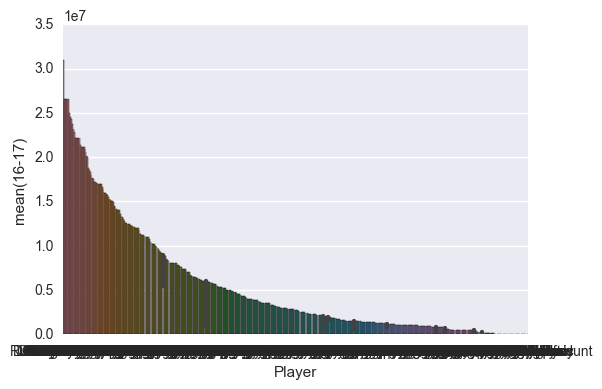

In [12]:
sns.barplot(salary.Player, salary['16-17'])

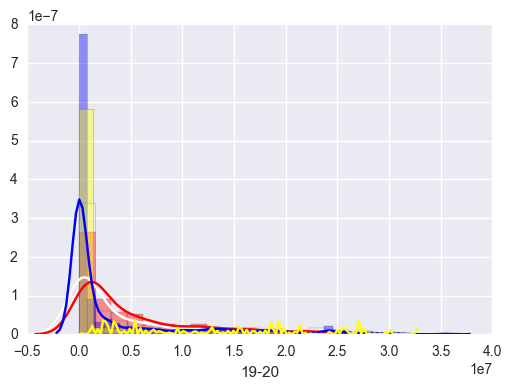

In [13]:
sns.distplot(salary['17-18'], kde = True, color='white')
sns.distplot(salary['16-17'], kde = True, color='red')
sns.distplot(salary['18-19'], kde = True, color='blue')
sns.distplot(salary['19-20'], kde = True, color='yellow')
# sns.distplot(salary['21-22'], kde = True, color='crimson')
# sns.distplot(salary['20-21'], kde = True, color='white')



In [14]:
salary.shape

(558, 11)